In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [17]:
df = pd.read_csv('/content/IMDb Movies India.csv', encoding='ISO-8859-1')


In [18]:
# Preview data
print("Initial Data Snapshot:")
print(df.head())
print("\nData Summary:")
print(df.info())


Initial Data Snapshot:
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  

In [19]:
df = df[['Genre', 'Director', 'Duration', 'Rating']]
df.rename(columns={'Duration': 'Runtime'}, inplace=True)
df.dropna(inplace=True)


/tmp/ipython-input-19-1416348766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Duration': 'Runtime'}, inplace=True)
/tmp/ipython-input-19-1416348766.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [20]:
# 3. ✅ Clean 'Runtime' column — this is the part you were missing
def clean_runtime(value):
    if pd.isna(value):
        return np.nan
    value = str(value)
    match = re.search(r'(\d+)', value)
    if match:
        return int(match.group(1))
    return np.nan

df['Runtime'] = df['Runtime'].apply(clean_runtime)

In [21]:
# 4. Drop rows with missing values
df.dropna(inplace=True)

In [22]:
# 5. Define features (X) and target (y)
X = df[['Genre', 'Director', 'Runtime']]
y = df['Rating']


In [23]:
# 6. Preprocessing: encode categorical variables
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Genre', 'Director'])
], remainder='passthrough')

In [24]:
# 7. Build model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [25]:
# 8. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# 9. ✅ Train the model
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Genre', 'Director'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [27]:
# 10. Predict
y_pred = model.predict(X_test)

In [28]:
# 11. Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"✅ R2 Score: {r2:.3f}")
print(f"✅ RMSE: {rmse:.3f}")

✅ R2 Score: 0.064
✅ RMSE: 1.325


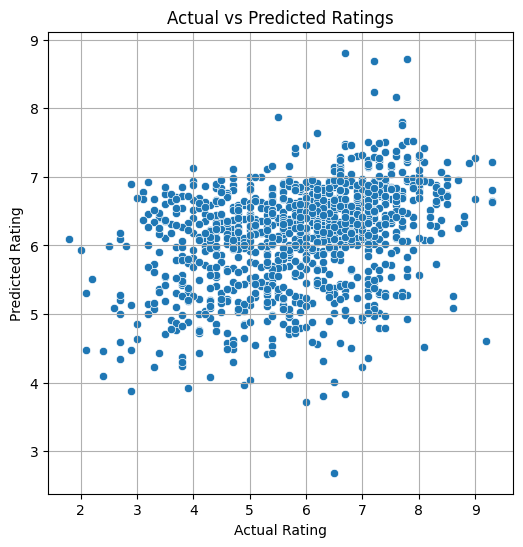

In [29]:
# 12. Plot actual vs predicted ratings
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Ratings")
plt.grid(True)
plt.show()